<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/IMSE441_Midterm_1_CPM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMSE 441 MIDTERM 1**

- Please rename the file as 'IMSE441_Midterm_1_(your initials)
- Complete your exam and upload the google colab code link as a submission
- Use whatever material you have as a reference when solving but please dont discuss with friends or simply copy without logic
- Total exam is 100 marks, of which 30points for in class exam and 70 marks is takehome for coding
- Of the 70 marks of coding, **5 points** will be awarded for writing the code in a well organized manner like **headings** and **# comments or interpretation of what you are doing in the code**. Make sure all graphs or pvalues have interpretation.

- ***Hint:*** If sample size of dataframe is already small, i.e. <=30, you **dont** need to create a smaller dataframe to perform t-test. 

**ALL THE VERY BEST!**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint 
from scipy.stats import binom
import scipy as scipy
%pip install pingouin
import pingouin as pg
from scipy.stats import hypergeom
from scipy.stats import norm
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=94e91d0cd03a2c06deb735defd87ad5513c34fcfb7a20bcee2f18191acc03c02
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


### **Question1:** (20 points)
a) Choose a discrete and continuous distribution of your choice, generate random samples and find their mean, variance and standard deviation. 

b)Plot pmf/pdf and cdf of both the distributions.

c)What is the difference between pmf and pdf?

A) 
Discrete Distribution

In [2]:
L=1
U=9

X = np.arange(L, U+1)

print(X)


[1 2 3 4 5 6 7 8 9]


In [3]:
#Mean #Variance 
mean, var=X.mean(),X.var()
mean, var

(5.0, 6.666666666666667)

In [4]:
std=np.std(X)
std

2.581988897471611

continous

In [32]:
x = np.random.randn(20)
x

array([-0.77510116,  0.67643094,  0.96022402, -0.66398837,  0.12444138,
       -0.3608685 ,  0.87470185,  1.52926343, -0.03947993,  0.4951032 ,
       -0.04823657,  1.47549478, -0.86461116, -0.86215086,  0.06637514,
        0.08544594,  1.6274191 ,  0.0351431 ,  0.5629854 ,  0.0075949 ])

In [33]:
mean, var, std= np.mean(x), np.var(x), np.std(x)
mean, var, std

(0.2453093322004279, 0.5681289304597724, 0.7537432788819893)

B)

In [6]:
D_uni_dist = randint(L, U+1)
D_uni_pmf = D_uni_dist.pmf(X)
D_uni_pmf = D_uni_dist.pmf(X)
D_uni_dist = randint(L, U+1)

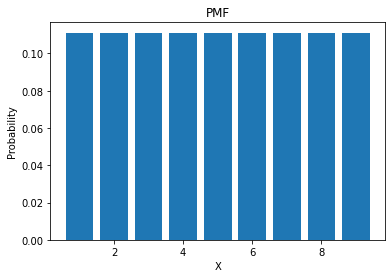

In [34]:
plt.bar(X, D_uni_pmf)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('PMF')
plt.show()

In [19]:
D_uni_cdf = D_uni_dist.cdf(X)

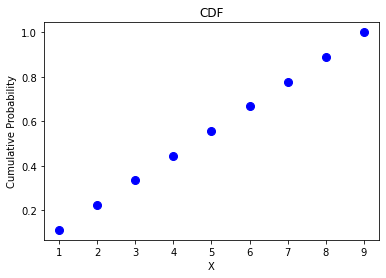

In [38]:
plt.plot(X, D_uni_cdf,'bo', ms=8)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('CDF')
plt.show()

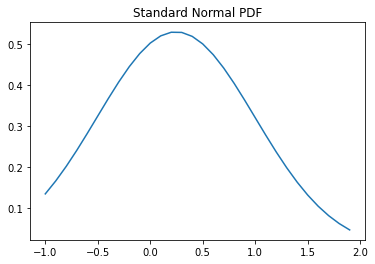

In [42]:
x=np.arange(-1,2,0.1)
plt.plot(x,norm.pdf(x,0.2453093322004279,0.7537432788819893))
plt.title('Standard Normal PDF')
plt.show()

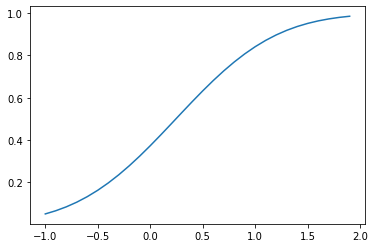

In [44]:
plt.plot(x,norm.cdf(x,0.2453093322004279,0.7537432788819893))
plt.title('')
plt.show()

C) What is the difference between pmf and pdf?
PMF is used to describe probability distributions that are discrete and PDF is used to describe probability distributions that are continous.

### **Question2:** (30 points)
a) Import the data "OTT_platform_data.csv" and perform data cleaning, descriptive statistics on the  dataset to generate clean data

b) How many people watch Netflix and how many watch prime? What is the mean time spent on both the platforms. 

c) Plot a pie chart to answer the question: Based on the dataset do people like Netflix or prime more?

d) Construct a boxplot to see variability of time data on both the platforms. From the plot, determine an approximate median value each platform

A)

In [4]:
#import data set
url ="https://raw.githubusercontent.com/KhmAsif/IMSE441/main/OTT_platform_data.csv"
df =pd.read_csv(url)
df.head()

,Platform,Time
0,Netflix,0.21
1,Amazon Prime,2.53
2,Netflix,0.35
3,Amazon Prime,0.71
4,Netflix,0.67


In [5]:
#Data Cleaning 
df.isnull().sum()

Platform    1
Time        2
dtype: int64

In [6]:
# Dropping nulls. 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  21 non-null     object 
 1   Time      21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [7]:
df.columns

Index(['Platform', 'Time'], dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Platform', 'Time'], dtype='object')

In [9]:
#Turning all the columns capitals into lower case.
df.columns = df.columns.str.lower()
df.columns

Index(['platform', 'time'], dtype='object')

B)

In [10]:
Netflix=(df[df['platform']=='Netflix']['time'])
Netflix

0     0.21
2     0.35
4     0.67
8     1.32
10    0.68
12    3.21
14    1.47
16    0.95
18    0.45
20    1.18
22    3.42
Name: time, dtype: float64

In [11]:
Amazon=(df[df['platform']=='Amazon Prime']['time'])
Amazon

1     2.53
3     0.71
5     0.85
7     2.46
9     1.49
13    3.33
15    1.87
17    1.26
19    0.48
21    1.47
Name: time, dtype: float64

In [12]:
df['time'].mean()

1.4457142857142857

In [13]:
Amazon.mean()

1.645

In [14]:
Netflix.mean()

1.2645454545454546

10 people watch Amazon Prime and 11 people watch Netflix. The average amount watched for Prime is 1.645 hours and Netflix is 1.265 hours

C)

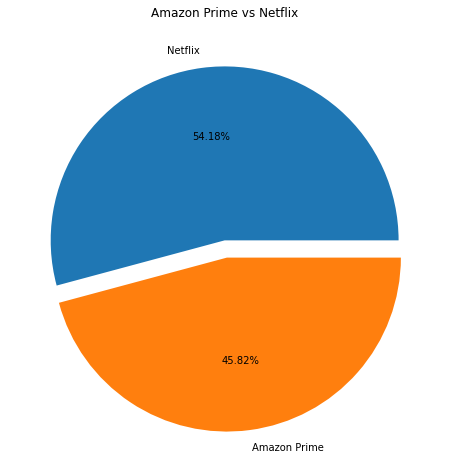

In [25]:
Type=['Netflix','Amazon Prime']
Profit=[sum(Amazon),sum(Netflix)]
plt.figure(figsize=(8,8))
plt.pie(Profit,labels=Type,autopct='%0.2f%%', explode=[0,0.1])
plt.title('Amazon Prime vs Netflix' )
plt.show()

Based on this people like Netflix slightly better than Amazon Prime.

D)

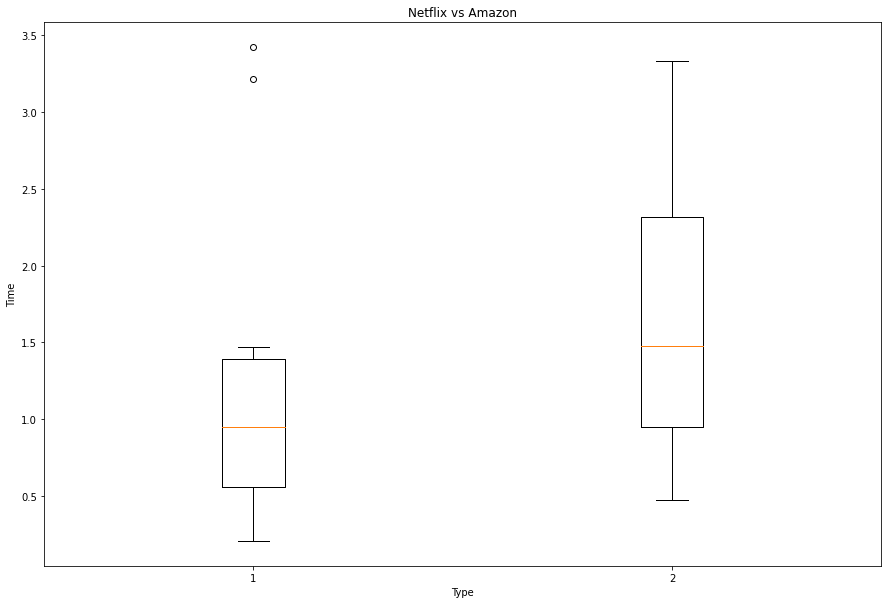

In [26]:
plt.figure(figsize=(15,10))
plt.boxplot([Netflix,Amazon])
plt.title('Netflix vs Amazon' )
plt.xlabel('Type')
plt.ylabel('Time')
plt.show()

from the boxplot we can see that the median value for Netflix is lower than Prime at roughly a 1 hour median vs a 1.5 hour median.

### **Question3:** (15 points)
a) Perform tests to check the distribution of 'Time' data in OTT_platform_data.csv before you can do t-test. Check eligibility and interpret your results.

b) Does the given data satisfy the criteria for t-testing eligibility? If so,perform t-test to see if 0.83 is an acceptable mean based on 99% significance level. Then create a 99% CI on the unknown mean value of 'Time'

c) Is it one sided or two sided CI?

d) What is the degree of freedom value for the test?

e) Calculate df['Time'].mean(), is it the actual mean or sample mean?



A)

Text(0.5, 1.0, 'Our Data')

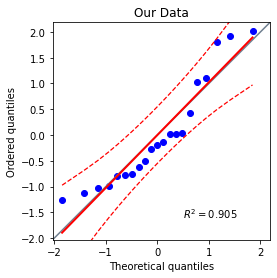

In [27]:
#Plotting data to see Normalitiy.
plt.show()
pg.qqplot(df['time']).set_title('Our Data')

In [28]:
#Second Test for normality
print(stats.normaltest(df['time']))

NormaltestResult(statistic=2.9693617401687833, pvalue=0.22657463588450225)


B)

In [29]:
#Perform ttesting
stats.ttest_1samp(df['time'],0.83)

TtestResult(statistic=2.817958669950323, pvalue=0.010626190992228224, df=20)

In [30]:
T,P = stats.ttest_1samp(df['time'],0.83)
T, P

(2.817958669950323, 0.010626190992228224)

In [31]:
CI= stats.ttest_1samp(df['time'],0.83).confidence_interval(confidence_level=0.99)
CI

ConfidenceInterval(low=0.8240173368904734, high=2.067411234538098)

In [35]:
if P < 0.01:
  print("Reject Null Hypothesis i.e. actual mean is NOT 0.83")
else:
  print("Accept Null Hypothesis i.e. actual mean is 0.83")

Accept Null Hypothesis i.e. actual mean is 0.83


It's in range for the mean by just .004

C)

Cl is two sided

D)

In [36]:
#degree of freedom
len(df)-1

20

20 degrees of freedom

E)

In [37]:
df['time'].mean()

1.4457142857142857

It is the actual Mean.